### Saudi Aqar prediction


The saudi real estate market is a fast-growing industry <br>
This dataset is collected and scrapped from Aqar website. The chosen cities are Riyadh, Jeddah, Dammam, and Al-Khobar. This dataset focused on the rental houses. It contains information about 3000 properties from various districts



#### | Names of columns with description and type:

| Columns     | Description                                                        |  
|-------------|:-------------:                                                     |
| city        |  city where house locate in                                        | 
| district    |  district where house locate in                                    |   
| front       |  What is the house front is north, west .. etc                     |    
| size        |  size in m^2                                                       |  
| propertyage |  property age for the house                                        | 
| bedrooms    |  number of bedrooms                                                | 
| bathrooms   |  number of bathrooms                                               | 
| livingrooms |  number of livingrooms                                             | 
| kitchen     |  show whether the house have a kitchen or not                      | 
| garage      |  show whether the house have a garage or not                       | 
| driverroom  |  show whether the house have a driverroom or not                   | 
| maidroom    |  show whether the house have a maid_room or not                    | 
| furnished   |  show whether the house is furnished or not                        | 
| ac          |  show whether the house have a ac or not                           | 
| roof        |  show whether the house have a space for roof on top or not        | 
| pool        |  show whether the house have a pool or not                         | 
| frontyard   |  show whether the house have a frontyard or not                    | 
| basement    |  show whether the house have a basement or not                     | 
| duplex      |  show whether the house is a duplex or not                         | 
| stairs      |  show whether the house have a stairs or not                       |
| elevator    |  show whether the house have an elevator or not                    |
| fireplace   |  show whether the house have a fireplace or not                    |
| price       |  show the price of the house                                       |
| details     |  shows any additional details from the house owner about the house |

### 1- Importing Libraries:
These are the most important libraries we need for our case

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy import stats 

### 2- Importing dataset:

In [36]:
H_test = pd.read_csv('/Users/awatefalshehri/Misk_DSI_2021/AA_ML_assignment/saudi_aqar_price_prediction/test_set/housing_test.csv')

### 3- Exploratory Data Analysis:
First, we want to take a look on our dataset, catagories & observations

In [37]:
H_test.head()

Unnamed: 0     city                district      front  size  property_age  \
0        2905    ÿßŸÑÿÆÿ®ÿ±             ÿ≠Ÿä ÿßŸÑÿµŸàÿßÿ±Ÿä        ÿ¥ŸÖÿßŸÑ   312             0   
1        1876   ÿßŸÑÿØŸÖÿßŸÖ     ÿ≠Ÿä ÿ∂ÿßÿ≠Ÿäÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ         ÿ¥ÿ±ŸÇ   250             0   
2        2270   ÿßŸÑÿØŸÖÿßŸÖ                ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   
3        3465    ÿßŸÑÿÆÿ®ÿ±             ÿ≠Ÿä ÿßŸÑÿ™ÿ≠ŸÑŸäÿ©         ÿ¥ÿ±ŸÇ   330             0   
4        2491   ÿßŸÑÿØŸÖÿßŸÖ                ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   

   bedrooms  bathrooms  livingrooms  kitchen  ...  roof  pool  frontyard  \
0         5          5            3        0  ...     1     0          1   
1         7          5            3        1  ...     1     0          1   
2         7          5            2        1  ...     1     0          1   
3         4          5            4        1  ...     1     0          1   
4         7          5            2        1  ...     1     0          1   

   basement  duplex  stairs  elevator  fireplace  price  \
0         0       1       1         0          0  45000   
1         0       1       1         0          0  50000   
2         0       0       1         0          1  55000   
3         0       0       0         0          0  80000   
4         0       0       1         0          1  55000   

                                             details  
0  ŸÅŸäŸÑÿß ŸÑŸÑÿßŸäÿ¨ÿßÿ± ŸÅŸä ÿßŸÑÿπÿ≤Ÿäÿ≤Ÿäÿ© \nÿßŸÑÿ≥ÿπÿ± Ÿ§Ÿ•ÿ£ŸÑŸÅ ÿ±ŸäÿßŸÑ \n...  
1                                                NaN  
2  ŸÑŸÑÿßÿ¨ÿßÿ± ÿ®Ÿäÿ™ ŸÅŸä ÿ≠Ÿä ÿ∑Ÿäÿ®Ÿá ÿ≤ÿßŸàŸäŸá\n\nŸÖŸÉŸàŸÜ ŸÖŸÜ \nÿßŸÑÿØŸàÿ±...  
3  ŸÅŸÑÿ© ŸÅŸä ÿßŸÑÿÆÿ®ÿ±  ÿ≠Ÿä ÿßŸÑÿ™ÿ≠ŸÑŸäÿ© ŸÖŸÇÿßÿ®ŸÑ ÿßŸÑÿ®ÿ≠ÿ± ÿßŸÑÿØŸàÿ± ÿßŸÑÿß...  
4  ŸÑŸÑÿßÿ¨ÿßÿ± ÿ®Ÿäÿ™ ŸÅŸä ÿ≠Ÿä ÿ∑Ÿäÿ®Ÿá ÿ≤ÿßŸàŸäŸá\n\nŸÖŸÉŸàŸÜ ŸÖŸÜ \nÿßŸÑÿØŸàÿ±...  

[5 rows x 25 columns]

- Getting information about our data, such as the shape of the data (rows & columns), name of columns we have, type of observations in columns, & count of non-null values

In [38]:
H_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    744 non-null    int64 
 1   city          744 non-null    object
 2   district      744 non-null    object
 3   front         744 non-null    object
 4   size          744 non-null    int64 
 5   property_age  744 non-null    int64 
 6   bedrooms      744 non-null    int64 
 7   bathrooms     744 non-null    int64 
 8   livingrooms   744 non-null    int64 
 9   kitchen       744 non-null    int64 
 10  garage        744 non-null    int64 
 11  driver_room   744 non-null    int64 
 12  maid_room     744 non-null    int64 
 13  furnished     744 non-null    int64 
 14  ac            744 non-null    int64 
 15  roof          744 non-null    int64 
 16  pool          744 non-null    int64 
 17  frontyard     744 non-null    int64 
 18  basement      744 non-null    int64 
 19  duplex  

Exploring how many columns and rows we have by .shape command

In [39]:
H_test.shape

(744, 25)

- Getting statisitical summary:

In [40]:
H_test.describe()

Unnamed: 0          size  property_age    bedrooms   bathrooms  \
count   744.000000    744.000000    744.000000  744.000000  744.000000   
mean   1857.166667    488.673387      4.790323    5.068548    4.614247   
std    1064.997086   3473.724730      7.284757    1.179402    0.711650   
min       2.000000    100.000000      0.000000    1.000000    1.000000   
25%     927.250000    282.250000      0.000000    4.000000    4.000000   
50%    1829.500000    334.500000      0.000000    5.000000    5.000000   
75%    2779.750000    400.000000      7.000000    6.000000    5.000000   
max    3715.000000  95000.000000     36.000000    7.000000    5.000000   

       livingrooms     kitchen      garage  driver_room   maid_room  ...  \
count   744.000000  744.000000  744.000000   744.000000  744.000000  ...   
mean      2.266129    0.901882    0.811828     0.506720    0.805108  ...   
std       0.918852    0.297675    0.391112     0.500291    0.396384  ...   
min       1.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%       2.000000    1.000000    1.000000     0.000000    1.000000  ...   
50%       2.000000    1.000000    1.000000     1.000000    1.000000  ...   
75%       3.000000    1.000000    1.000000     1.000000    1.000000  ...   
max       5.000000    1.000000    1.000000     1.000000    1.000000  ...   

               ac        roof        pool   frontyard    basement      duplex  \
count  744.000000  744.000000  744.000000  744.000000  744.000000  744.000000   
mean     0.549731    0.528226    0.166667    0.797043    0.034946    0.513441   
std      0.497855    0.499538    0.372929    0.402471    0.183767    0.500156   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    0.000000    1.000000    0.000000    1.000000   
75%      1.000000    1.000000    0.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           stairs    elevator   fireplace          price  
count  744.000000  744.000000  744.000000     744.000000  
mean     0.805108    0.088710    0.168011   87939.970430  
std      0.396384    0.284516    0.374127   63573.696808  
min      0.000000    0.000000    0.000000    1000.000000  
25%      1.000000    0.000000    0.000000   55000.000000  
50%      1.000000    0.000000    0.000000   75000.000000  
75%      1.000000    0.000000    0.000000  100000.000000  
max      1.000000    1.000000    1.000000  700000.000000  

[8 rows x 21 columns]

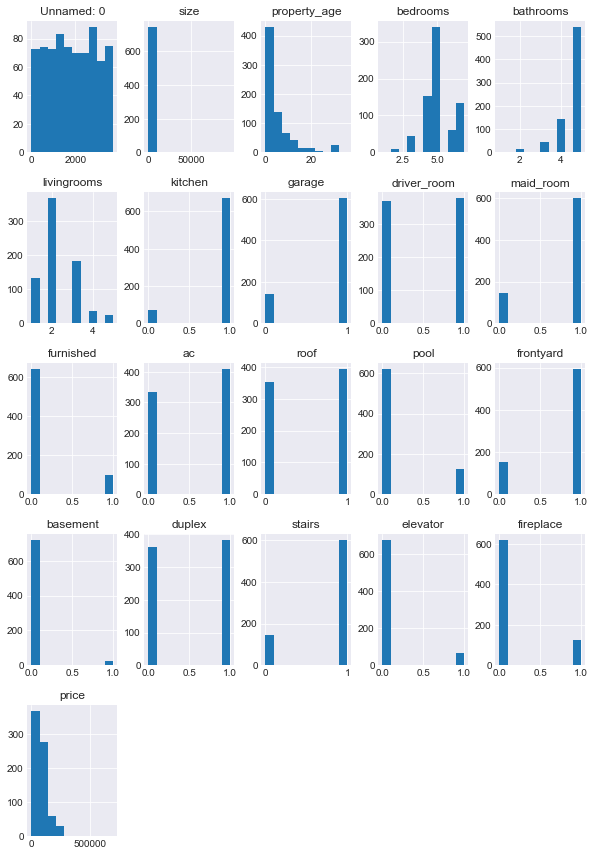

In [41]:
viz = H_test
viz.hist(figsize = (10,15))
plt.show() 

- We noticed earlier that there are some null values in the details column, so we run the below code to count them
- As the null values are in the details column, and when we explored the dataset, we found that the details column is a descriptive column that would not hurt our anlaysis. Thus, we can continue our analysis without droping them.

In [42]:
H_test.isnull().sum()

Unnamed: 0       0
city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         18
dtype: int64

- Here we want to find the relation between the number of bedrooms and the price regardless of the city the unit is in:

In [43]:
H_test.groupby(['bedrooms']).price.agg(['mean'])

mean
bedrooms              
1          1000.000000
2         59000.000000
3         84111.222222
4         93992.422078
5         93199.115044
6         73393.442623
7         78395.522388

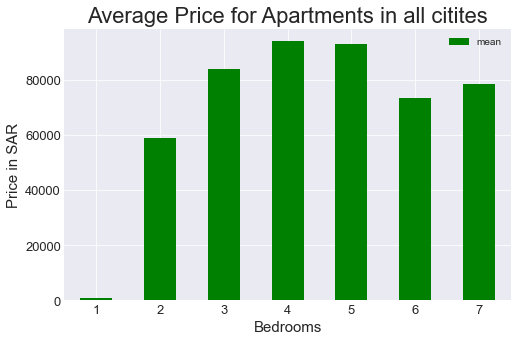

In [44]:
Bedrooms_prices = H_test.groupby(['bedrooms']).price.agg(['mean'])
ax = Bedrooms_prices.plot(kind='bar', figsize=(8,5), color="green", fontsize=13)
plt.style.use('seaborn-darkgrid')
plt.title('Average Price for Apartments in all citites', fontsize=22)
plt.xlabel('Bedrooms', fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel('Price in SAR', fontsize = 15)
plt.show()


- Here, we fruther more explore the relation between number of bedrooms and the price, but here we we even compare the cities in which the apartments are located:

In [45]:
# Average price for aapartment types in all cities
# We also see that ÿßŸÑÿÆÿ®ÿ± has no 2bed apts listed in our data
H_test.groupby(['city', "bedrooms"]).price.agg(['mean'])

mean
city    bedrooms               
 ÿßŸÑÿÆÿ®ÿ±  3          65000.000000
        4         112700.000000
        5          75073.170732
        6          59818.181818
        7          68206.896552
 ÿßŸÑÿØŸÖÿßŸÖ 3          60000.000000
        4          49320.000000
        5          55884.057971
        6          72357.142857
        7          74134.615385
 ÿßŸÑÿ±Ÿäÿßÿ∂ 2          20000.000000
        3          97526.315789
        4          90054.480769
        5          92017.045455
        6          99375.000000
        7          91000.000000
 ÿ¨ÿØÿ©    1           1000.000000
        2          63333.333333
        3          95200.500000
        4         108296.296296
        5         134850.000000
        6         115833.333333
        7          86129.032258

- In the below bar plot, we are comparing the average number of bedrooms in each city, Riyadh, Jeddah, Dammam, Alkhobar.

Text(0.5, 1.0, 'Average Number of Bedrooms in each City')

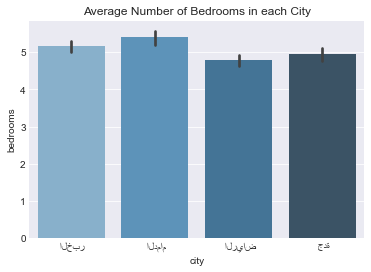

In [46]:
#plt.style.use('seaborn-darkgrid')
sns.barplot(data = H_test, x = 'city', y = 'bedrooms',palette="Blues_d")
plt.title('Average Number of Bedrooms in each City') 

- Heat map to find the correlation between the different features

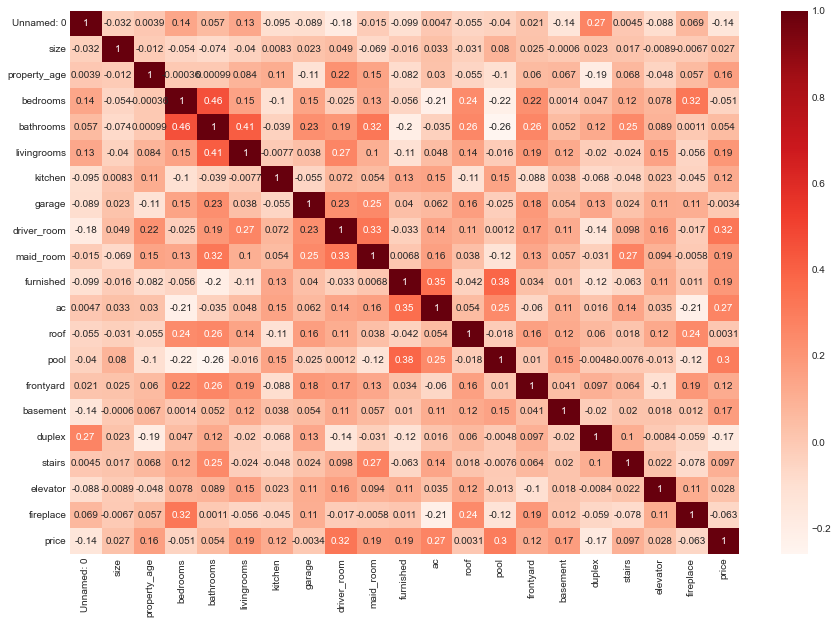

In [47]:
plt.figure(figsize=(15,10))
cor = H_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show(); 

- We found that highest corollation is between size and price 

### 4- Data Cleaning:
- First, we noticed a column that has no use in our data, so we decided to drop this column:

In [48]:
H_test.drop('Unnamed: 0', inplace=True, axis=1)

- We also noticed prices that are lower than usual. Then during exploring their details, we found that they were actually monthly prices placed in the price column without being edited as annual prices. 

### Check the rent due frequnecy

- In the details column, some of the rows have information about the rent due frequency, monthly or daily. 
- Therefore, we added a new column to classify the rent frequency IF it is clearly mentioned in the details column. 

In [49]:
def fixRent(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('ÿ¥Ÿáÿ±') != -1 or details.find('ÿ¥Ÿáÿ±Ÿä') != -1 or details.find('ÿ®ÿßŸÑÿ¥Ÿáÿ±') != -1):
        rent = 'Monthly'
    elif( details.find('ŸäŸàŸÖ') != -1  or details.find('ŸäŸàŸÖŸä') != -1 or details.find('ÿ®ÿßŸÑŸäŸàŸÖ') != -1 ):
        rent = 'Daily'
    else:
        rent = 'Unkown'
        
    return rent

H_test.loc[:,'Rent Frequnecy'] = H_test.loc[:,'details'].apply(fixRent)

In [50]:
H_test.groupby(['Rent Frequnecy']).size()

Rent Frequnecy
Daily        4
Monthly     18
Unkown     722
dtype: int64


- Therefore, we defined fixRentAmount formula to look for the observations below 10,000 SAR and multiply them by 12 to get their annual price as most of the observations.

In [51]:
def fixRentAmount(price):

    if( price < 10000):
        price = price * 12
    return price

H_test.loc[:,'price'] = H_test.loc[:,'price'].apply(fixRentAmount)

In [52]:
H_test.loc[:,['price',"details",'Rent Frequnecy']]

price                                            details Rent Frequnecy
0    45000  ŸÅŸäŸÑÿß ŸÑŸÑÿßŸäÿ¨ÿßÿ± ŸÅŸä ÿßŸÑÿπÿ≤Ÿäÿ≤Ÿäÿ© \nÿßŸÑÿ≥ÿπÿ± Ÿ§Ÿ•ÿ£ŸÑŸÅ ÿ±ŸäÿßŸÑ \n...         Unkown
1    50000                                                NaN         Unkown
2    55000  ŸÑŸÑÿßÿ¨ÿßÿ± ÿ®Ÿäÿ™ ŸÅŸä ÿ≠Ÿä ÿ∑Ÿäÿ®Ÿá ÿ≤ÿßŸàŸäŸá\n\nŸÖŸÉŸàŸÜ ŸÖŸÜ \nÿßŸÑÿØŸàÿ±...         Unkown
3    80000  ŸÅŸÑÿ© ŸÅŸä ÿßŸÑÿÆÿ®ÿ±  ÿ≠Ÿä ÿßŸÑÿ™ÿ≠ŸÑŸäÿ© ŸÖŸÇÿßÿ®ŸÑ ÿßŸÑÿ®ÿ≠ÿ± ÿßŸÑÿØŸàÿ± ÿßŸÑÿß...         Unkown
4    55000  ŸÑŸÑÿßÿ¨ÿßÿ± ÿ®Ÿäÿ™ ŸÅŸä ÿ≠Ÿä ÿ∑Ÿäÿ®Ÿá ÿ≤ÿßŸàŸäŸá\n\nŸÖŸÉŸàŸÜ ŸÖŸÜ \nÿßŸÑÿØŸàÿ±...         Unkown
..     ...                                                ...            ...
739  60000  ŸäŸÇÿπ ŸÖÿ¨ŸÖÿπ ÿßŸÑÿπÿßÿ¶ŸÑÿ© ŸÅŸä ÿßŸÑÿØŸÖÿßŸÖ ÿßÿ≥ÿ™ÿ±ÿßÿ™Ÿäÿ¨ŸäŸãÿß ÿ®ÿßŸÑŸÇÿ±ÿ® ...         Unkown
740  37000  ŸÅŸÑÿß ŸÑŸÑÿßŸäÿ¨ÿßÿ± ŸÅŸâ ÿßŸÑÿ≠Ÿä ÿßŸÑÿÆÿßŸÖÿ≥ ÿßŸÑÿ™ÿßÿ≥ÿπ \nÿ™ÿ™ŸÉŸàŸÜ ÿ´ŸÑÿßÿ´...         Unkown
741  46000  ŸÅŸÑŸá ŸÑŸÑÿßŸäÿ¨ÿßÿ± ÿ¨ÿØŸäÿØÿ© ( ÿØÿ±ÿ¨ ÿØÿßÿÆŸÑŸä )\nÿßŸÑÿØŸàÿ± ÿßŸÑÿßÿ±ÿ∂Ÿä ...         Unkown
742  55000  ÿ•Ÿäÿ¨ÿßÿ± ŸÅŸäŸÑÿß ÿ≠Ÿä ÿßŸÑŸÇÿßÿØÿ≥Ÿäÿ© ŸÖÿ≥ÿßÿ≠ÿ© Ÿ¢Ÿ•Ÿ† ŸÖÿ™ÿ± ÿØÿ±ÿ¨ ÿØÿßÿÆŸÑŸä...         Unkown
743  48000  ŸÅŸäŸÑÿß ŸÑŸÑÿßŸäÿ¨ÿßÿ± ÿ≠Ÿä ÿßŸÑÿ±ŸÖÿßŸÑ ÿßŸÑŸàÿßÿ≠Ÿá ÿ∫ÿ±ŸÅÿ© ŸÉÿ®ÿßÿ± ÿ≥ŸÜ ŸàŸÖŸÇ...         Unkown

[744 rows x 3 columns]

- When we took a further look on the Daily rentals, we decided to not fix them to make them monthly or yearly. For example, if we do so in the first unit in the below table, we would have 3000 x 365 = 1,095,000 SAR and it would be an outlier value that would a negative impact on our over all analysis.
- Thus, We decided to keep it with no change in our data as it would be much closer to our cheapest rent price than to the most expensive one. 

In [53]:
H_test[H_test['Rent Frequnecy'] == 'Daily']

city         district front  size  property_age  bedrooms  bathrooms  \
77      ÿ¨ÿØÿ©       ÿ≠Ÿä ÿßŸÑÿ±Ÿäÿßÿ∂   ÿ¨ŸÜŸàÿ®   420             6         5          5   
275   ÿßŸÑÿÆÿ®ÿ±     ÿ≠Ÿä ÿßŸÑÿπŸÇÿ±ÿ®Ÿäÿ©   ÿ¥ŸÖÿßŸÑ   420            20         3          4   
314     ÿ¨ÿØÿ©       ÿ≠Ÿä ÿßŸÑÿ¥ÿßÿ∑ÿ¶    ÿ∫ÿ±ÿ®   350             0         3          5   
557     ÿ¨ÿØÿ©       ÿ≠Ÿä ÿßŸÑÿ≤ŸÖÿ±ÿØ   ÿ¥ŸÖÿßŸÑ   150            10         1          1   

     livingrooms  kitchen  garage  ...  pool  frontyard  basement  duplex  \
77             2        1       1  ...     0          1         0       0   
275            3        1       0  ...     0          0         0       0   
314            2        1       1  ...     0          1         0       0   
557            1        1       1  ...     1          0         0       1   

     stairs  elevator  fireplace  price  \
77        0         0          0  45000   
275       0         0          0  55000   
314       1         0          0  24000   
557       1         1          1  12000   

                                               details  Rent Frequnecy  
77   ŸÑŸÑÿßŸäÿ¨ÿßÿ± ÿ®ÿπŸÇÿØ ŸäÿµŸÑ ÿ•ŸÑŸâ Ÿ£ ÿ≥ŸÜŸàÿßÿ™ \nÿßŸÑÿπŸÇÿßÿ± ÿ®ŸÖÿ¥ÿßÿ±ŸÅÿå ...           Daily  
275  ŸÅŸäŸÑÿß ŸÑŸÑÿßŸäÿ¨ÿßÿ± ÿ®ÿßŸÑÿÆÿ®ÿ± ÿ≠Ÿä  ÿßŸÑÿπŸÇÿ±ÿ®Ÿäÿ© ÿ®ÿßŸÑŸÇÿ±ÿ® ŸÖŸÜ ŸÖÿ≥ÿ™...           Daily  
314  ŸÅŸäŸÑÿß ŸÖÿ§ÿ´ÿ´ÿ© ŸÑŸÑÿ•Ÿäÿ¨ÿßÿ± ÿßŸÑŸäŸàŸÖŸä ÿ®ÿßŸÑÿ≥ÿπÿ± ÿßŸÑŸÖÿ≥ÿ¨ŸÑ \nŸàÿßŸÑÿ≥...           Daily  
557  ÿ£ÿ±ŸÇŸâ Ÿàÿ£ŸÅÿÆŸÖ ÿßŸÑŸÅŸäŸÑŸÑ ŸÑŸÑÿßŸäÿ¨ÿßÿ± ÿßŸÑŸäŸàŸÖŸä ŸàÿßŸÑÿ≥ŸÜŸàŸä ŸÅŸä ÿØÿ±...           Daily  

[4 rows x 25 columns]

In [54]:
Daily_rent = H_test[H_test['Rent Frequnecy'] == 'Daily']
# the prices of the daily rents has been multiplied x12 to fix the monthly prices and to avoid having outliers in our analysis. 
# the actual daily price can bel caluclated using this code: 
Daily_rent['price'].replace([36000, 30000, 130000, 24000, 50000], [36000/12, 30000/12, 130000/12, 24000/12, 50000/12], inplace=True)
# but we are not going to apply on the actual data as the daily rents are only 5 units
# and it would harm our overall model if it is way lower than the minimum rent value.
Daily_rent

/var/folders/p4/sbh49n9d72nf0t33qvwkxvw00000gn/T/ipykernel_12489/323628269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily_rent['price'].replace([36000, 30000, 130000, 24000, 50000], [36000/12, 30000/12, 130000/12, 24000/12, 50000/12], inplace=True)


city         district front  size  property_age  bedrooms  bathrooms  \
77      ÿ¨ÿØÿ©       ÿ≠Ÿä ÿßŸÑÿ±Ÿäÿßÿ∂   ÿ¨ŸÜŸàÿ®   420             6         5          5   
275   ÿßŸÑÿÆÿ®ÿ±     ÿ≠Ÿä ÿßŸÑÿπŸÇÿ±ÿ®Ÿäÿ©   ÿ¥ŸÖÿßŸÑ   420            20         3          4   
314     ÿ¨ÿØÿ©       ÿ≠Ÿä ÿßŸÑÿ¥ÿßÿ∑ÿ¶    ÿ∫ÿ±ÿ®   350             0         3          5   
557     ÿ¨ÿØÿ©       ÿ≠Ÿä ÿßŸÑÿ≤ŸÖÿ±ÿØ   ÿ¥ŸÖÿßŸÑ   150            10         1          1   

     livingrooms  kitchen  garage  ...  pool  frontyard  basement  duplex  \
77             2        1       1  ...     0          1         0       0   
275            3        1       0  ...     0          0         0       0   
314            2        1       1  ...     0          1         0       0   
557            1        1       1  ...     1          0         0       1   

     stairs  elevator  fireplace  price  \
77        0         0          0  45000   
275       0         0          0  55000   
314       1         0          0   2000   
557       1         1          1  12000   

                                               details  Rent Frequnecy  
77   ŸÑŸÑÿßŸäÿ¨ÿßÿ± ÿ®ÿπŸÇÿØ ŸäÿµŸÑ ÿ•ŸÑŸâ Ÿ£ ÿ≥ŸÜŸàÿßÿ™ \nÿßŸÑÿπŸÇÿßÿ± ÿ®ŸÖÿ¥ÿßÿ±ŸÅÿå ...           Daily  
275  ŸÅŸäŸÑÿß ŸÑŸÑÿßŸäÿ¨ÿßÿ± ÿ®ÿßŸÑÿÆÿ®ÿ± ÿ≠Ÿä  ÿßŸÑÿπŸÇÿ±ÿ®Ÿäÿ© ÿ®ÿßŸÑŸÇÿ±ÿ® ŸÖŸÜ ŸÖÿ≥ÿ™...           Daily  
314  ŸÅŸäŸÑÿß ŸÖÿ§ÿ´ÿ´ÿ© ŸÑŸÑÿ•Ÿäÿ¨ÿßÿ± ÿßŸÑŸäŸàŸÖŸä ÿ®ÿßŸÑÿ≥ÿπÿ± ÿßŸÑŸÖÿ≥ÿ¨ŸÑ \nŸàÿßŸÑÿ≥...           Daily  
557  ÿ£ÿ±ŸÇŸâ Ÿàÿ£ŸÅÿÆŸÖ ÿßŸÑŸÅŸäŸÑŸÑ ŸÑŸÑÿßŸäÿ¨ÿßÿ± ÿßŸÑŸäŸàŸÖŸä ŸàÿßŸÑÿ≥ŸÜŸàŸä ŸÅŸä ÿØÿ±...           Daily  

[4 rows x 25 columns]

### Accomodation Types
- While wr were exploring our data, we found that there are no classification for the kind of unit. Meaning, the dataset does not have a column or a catagory that specify the type of the listed units, is it a house, apartment, or a whole floor? 
- Therefore, we decided to make a new column called "Accomodation Types" that would classify the unit type for us.

In [55]:
def fixTypes(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('ÿ¥ŸÇŸá') != -1 or  details.find('ÿ¥ŸÇÿ©') != -1):
        rent = 'apartment'  
    elif( details.find('ŸÅŸÑŸá') != -1 or details.find('ŸÅŸÑÿ©') != -1 or details.find('ŸÅŸäŸÑÿß') != -1 or details.find('ÿØÿ®ŸÑŸÉÿ≥') != -1 
        or details.find('ÿØŸàÿ®ŸÑŸÉÿ≥') != -1 or details.find('⁄§ŸäŸÑÿß') != -1 or details.find('ŸÅŸÑŸÑ') != -1 or details.find('ÿØÿ®ŸÑŸàŸÉÿ≥ŸäŸÜ') != -1 
        or details.find('ŸÅŸÑÿß') != -1 or details.find('ŸÅŸäŸÑÿß ') != -1 or details.find('ÿØÿ®ŸÑŸàŸÉÿ≥ ') != -1) or details.find('ŸÅŸÑÿß') != -1 :  
        rent = 'house'
    elif( details.find('ÿØŸàÿ±') != -1 or details.find('ÿØŸàÿ±') != -1 ):
        rent = 'floor'
    else:
        rent = 'Unkown'
        
    return rent

H_test.loc[:,'Accommodation Types'] = H_test.loc[:,'details'].apply(fixTypes)

In [56]:
H_test.groupby(['Accommodation Types']).size()

Accommodation Types
Unkown        50
apartment     13
floor         54
house        627
dtype: int64

In [57]:
H_test.head()

city                district      front  size  property_age  bedrooms  \
0    ÿßŸÑÿÆÿ®ÿ±             ÿ≠Ÿä ÿßŸÑÿµŸàÿßÿ±Ÿä        ÿ¥ŸÖÿßŸÑ   312             0         5   
1   ÿßŸÑÿØŸÖÿßŸÖ     ÿ≠Ÿä ÿ∂ÿßÿ≠Ÿäÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ         ÿ¥ÿ±ŸÇ   250             0         7   
2   ÿßŸÑÿØŸÖÿßŸÖ                ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4         7   
3    ÿßŸÑÿÆÿ®ÿ±             ÿ≠Ÿä ÿßŸÑÿ™ÿ≠ŸÑŸäÿ©         ÿ¥ÿ±ŸÇ   330             0         4   
4   ÿßŸÑÿØŸÖÿßŸÖ                ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4         7   

   bathrooms  livingrooms  kitchen  garage  ...  frontyard  basement  duplex  \
0          5            3        0       0  ...          1         0       1   
1          5            3        1       1  ...          1         0       1   
2          5            2        1       1  ...          1         0       0   
3          5            4        1       1  ...          1         0       0   
4          5            2        1       1  ...          1         0       0   

   stairs  elevator  fireplace  price  \
0       1         0          0  45000   
1       1         0          0  50000   
2       1         0          1  55000   
3       0         0          0  80000   
4       1         0          1  55000   

                                             details  Rent Frequnecy  \
0  ŸÅŸäŸÑÿß ŸÑŸÑÿßŸäÿ¨ÿßÿ± ŸÅŸä ÿßŸÑÿπÿ≤Ÿäÿ≤Ÿäÿ© \nÿßŸÑÿ≥ÿπÿ± Ÿ§Ÿ•ÿ£ŸÑŸÅ ÿ±ŸäÿßŸÑ \n...          Unkown   
1                                                NaN          Unkown   
2  ŸÑŸÑÿßÿ¨ÿßÿ± ÿ®Ÿäÿ™ ŸÅŸä ÿ≠Ÿä ÿ∑Ÿäÿ®Ÿá ÿ≤ÿßŸàŸäŸá\n\nŸÖŸÉŸàŸÜ ŸÖŸÜ \nÿßŸÑÿØŸàÿ±...          Unkown   
3  ŸÅŸÑÿ© ŸÅŸä ÿßŸÑÿÆÿ®ÿ±  ÿ≠Ÿä ÿßŸÑÿ™ÿ≠ŸÑŸäÿ© ŸÖŸÇÿßÿ®ŸÑ ÿßŸÑÿ®ÿ≠ÿ± ÿßŸÑÿØŸàÿ± ÿßŸÑÿß...          Unkown   
4  ŸÑŸÑÿßÿ¨ÿßÿ± ÿ®Ÿäÿ™ ŸÅŸä ÿ≠Ÿä ÿ∑Ÿäÿ®Ÿá ÿ≤ÿßŸàŸäŸá\n\nŸÖŸÉŸàŸÜ ŸÖŸÜ \nÿßŸÑÿØŸàÿ±...          Unkown   

   Accommodation Types  
0                house  
1               Unkown  
2                floor  
3                house  
4                floor  

[5 rows x 26 columns]

- After making the new Accomodation Types column, we want to have further more explained table that is grouped by the units city, district, type, and average size. 
- We can see that regardless of the accomodation type, size in the Saudi market does not rely on the type of unit. From the table below, we see that floor units can have bigger sizes than houses. Thus, we cannot say that houses are always bigger than floor apartments in the Saudi market.
- Accommodatio type is not a factor that would change the unit size in our data

In [58]:
Multi_features1 = H_test.groupby(['city', 'district','Accommodation Types'])['size'].mean().to_frame()
Multi_features1.sample(15)

size
city    district        Accommodation Types             
 ÿßŸÑÿÆÿ®ÿ±     ÿ≠Ÿä ÿßŸÑÿ™ÿ≠ŸÑŸäÿ©   house                 393.750000
 ÿßŸÑÿ±Ÿäÿßÿ∂    ÿ≠Ÿä ÿßŸÑŸÖÿ≠ŸÖÿØŸäÿ©  house                 460.000000
 ÿßŸÑÿØŸÖÿßŸÖ    ÿ≠Ÿä ÿßŸÑŸÖŸÜÿßÿ±    house                 305.882353
 ÿßŸÑÿÆÿ®ÿ±     ÿ≠Ÿä ÿßŸÑÿµŸàÿßÿ±Ÿä   Unkown                300.000000
 ÿßŸÑÿ±Ÿäÿßÿ∂    ÿ≠Ÿä ÿßŸÑÿ±Ÿàÿ∂ÿ©    house                 900.000000
           ÿ≠Ÿä ÿßŸÑÿπŸÑŸäÿß    Unkown                300.000000
           ÿ≠Ÿä ÿßŸÑŸÖŸáÿØŸäÿ©   house                 420.000000
 ÿßŸÑÿØŸÖÿßŸÖ    ÿ≠Ÿä ÿßŸÑŸÖŸÜÿ™ÿ≤Ÿá   house                 387.000000
 ÿßŸÑÿ±Ÿäÿßÿ∂    ÿ≠Ÿä ÿßŸÑÿπŸÇŸäŸÇ    house                 850.000000
           ÿ≠Ÿä ÿßŸÑŸÇÿßÿØÿ≥Ÿäÿ©  floor                 367.500000
 ÿ¨ÿØÿ©       ÿ≠Ÿä ÿßŸÑÿ¥ÿßÿ∑ÿ¶    house                7121.000000
 ÿßŸÑÿ±Ÿäÿßÿ∂    ÿ≠Ÿä ÿßŸÑÿ±ŸÖÿßŸÑ    house                 338.666667
           ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ŸÖ     floor                 320.000000
 ÿßŸÑÿØŸÖÿßŸÖ    ÿ≠Ÿä ÿßŸÑŸÅÿ±ÿ≥ÿßŸÜ   house                 350.000000
           ÿ≠Ÿä ÿßŸÑÿ¥ÿπŸÑÿ©    house                 313.636364

- Having a deeper look on floor units

In [59]:
d_floor = H_test[H_test['Accommodation Types'] == 'floor']
d_floor

city                 district      front  size  property_age  \
2     ÿßŸÑÿØŸÖÿßŸÖ                 ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   
4     ÿßŸÑÿØŸÖÿßŸÖ                 ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   
10       ÿ¨ÿØÿ©               ÿ≠Ÿä ÿßŸÑÿ≤ŸÖÿ±ÿØ        ÿ¥ŸÖÿßŸÑ   600             4   
19    ÿßŸÑÿØŸÖÿßŸÖ        ÿ≠Ÿä ÿßŸÑÿ¥ÿßÿ∑ÿ¶ ÿßŸÑÿ∫ÿ±ÿ®Ÿä        ÿ¥ŸÖÿßŸÑ   380             0   
52       ÿ¨ÿØÿ©               ÿ≠Ÿä ÿßŸÑÿ±Ÿàÿ∂ÿ©         ÿ∫ÿ±ÿ®   656             0   
61    ÿßŸÑÿØŸÖÿßŸÖ        ÿ≠Ÿä ÿßŸÑÿ¥ÿßÿ∑ÿ¶ ÿßŸÑÿ∫ÿ±ÿ®Ÿä        ÿ¥ŸÖÿßŸÑ   380             0   
63     ÿßŸÑÿÆÿ®ÿ±               ÿ≠Ÿä ÿßŸÑŸÑÿ§ŸÑÿ§         ÿ∫ÿ±ÿ®   330             0   
73    ÿßŸÑÿ±Ÿäÿßÿ∂                ÿ≠Ÿä ÿßŸÑÿ¥ÿ±ŸÇ        ÿ¨ŸÜŸàÿ®   300             0   
78    ÿßŸÑÿØŸÖÿßŸÖ        ÿ≠Ÿä ÿßŸÑÿ¥ÿßÿ∑ÿ¶ ÿßŸÑÿ∫ÿ±ÿ®Ÿä        ÿ¥ŸÖÿßŸÑ   380             0   
108    ÿßŸÑÿÆÿ®ÿ±               ÿ≠Ÿä ÿßŸÑŸÑÿ§ŸÑÿ§         ÿ∫ÿ±ÿ®   330             0   
119   ÿßŸÑÿØŸÖÿßŸÖ                 ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   
128   ÿßŸÑÿ±Ÿäÿßÿ∂                ÿ≠Ÿä ÿßŸÑÿ¥ÿ±ŸÇ        ÿ¨ŸÜŸàÿ®   375             0   
147      ÿ¨ÿØÿ©             ÿ≠Ÿä ÿßŸÑÿ®ÿ≥ÿßÿ™ŸäŸÜ        ÿ¨ŸÜŸàÿ®   375             7   
176   ÿßŸÑÿ±Ÿäÿßÿ∂     ÿ≠Ÿä ÿßŸÑÿπÿ±Ÿäÿ¨ÿßÿ° ÿßŸÑÿ∫ÿ±ÿ®Ÿäÿ©     3 ÿ¥Ÿàÿßÿ±ÿπ  1600             4   
186    ÿßŸÑÿÆÿ®ÿ±               ÿ≠Ÿä ÿßŸÑŸÑÿ§ŸÑÿ§         ÿ∫ÿ±ÿ®   330             0   
214   ÿßŸÑÿ±Ÿäÿßÿ∂             ÿ≠Ÿä ÿ∏Ÿáÿ±ÿ© ŸÑÿ®ŸÜ         ÿ¥ÿ±ŸÇ   200             6   
222      ÿ¨ÿØÿ©                 ÿ≠Ÿä ŸÖÿ±ŸäÿÆ   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   420             0   
225    ÿßŸÑÿÆÿ®ÿ±        ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ÿßŸÖ ÿßŸÑÿßÿÆÿ∂ÿ±        ÿ¨ŸÜŸàÿ®   400             4   
258   ÿßŸÑÿØŸÖÿßŸÖ                 ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   
265    ÿßŸÑÿÆÿ®ÿ±               ÿ≠Ÿä ÿßŸÑŸÑÿ§ŸÑÿ§         ÿ∫ÿ±ÿ®   330             0   
280    ÿßŸÑÿÆÿ®ÿ±               ÿ≠Ÿä ÿßŸÑŸÑÿ§ŸÑÿ§         ÿ∫ÿ±ÿ®   330             0   
308   ÿßŸÑÿØŸÖÿßŸÖ        ÿ≠Ÿä ÿßŸÑÿ¥ÿßÿ∑ÿ¶ ÿßŸÑÿ∫ÿ±ÿ®Ÿä        ÿ¥ŸÖÿßŸÑ   380             0   
316    ÿßŸÑÿÆÿ®ÿ±               ÿ≠Ÿä ÿßŸÑŸÑÿ§ŸÑÿ§         ÿ∫ÿ±ÿ®   330             0   
340    ÿßŸÑÿÆÿ®ÿ±               ÿ≠Ÿä ÿßŸÑŸÑÿ§ŸÑÿ§         ÿ∫ÿ±ÿ®   330             0   
364   ÿßŸÑÿ±Ÿäÿßÿ∂                ÿ≠Ÿä ÿßŸÑÿ¥ÿ±ŸÇ        ÿ¥ŸÖÿßŸÑ   450             0   
387   ÿßŸÑÿØŸÖÿßŸÖ                 ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   
399   ÿßŸÑÿØŸÖÿßŸÖ        ÿ≠Ÿä ÿßŸÑÿ¥ÿßÿ∑ÿ¶ ÿßŸÑÿ∫ÿ±ÿ®Ÿä        ÿ¥ŸÖÿßŸÑ   380             0   
422   ÿßŸÑÿ±Ÿäÿßÿ∂             ÿ≠Ÿä ÿ∏Ÿáÿ±ÿ© ŸÑÿ®ŸÜ         ÿ∫ÿ±ÿ®   450             0   
425    ÿßŸÑÿÆÿ®ÿ±        ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ÿßŸÖ ÿßŸÑÿßÿÆÿ∂ÿ±        ÿ¨ŸÜŸàÿ®   400             4   
441    ÿßŸÑÿÆÿ®ÿ±        ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ÿßŸÖ ÿßŸÑÿßÿÆÿ∂ÿ±        ÿ¨ŸÜŸàÿ®   400             4   
446      ÿ¨ÿØÿ©               ÿ≠Ÿä ÿßŸÑŸÜÿπŸäŸÖ        ÿ¨ŸÜŸàÿ®   600            17   
473    ÿßŸÑÿÆÿ®ÿ±        ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ÿßŸÖ ÿßŸÑÿßÿÆÿ∂ÿ±        ÿ¨ŸÜŸàÿ®   400             4   
474   ÿßŸÑÿØŸÖÿßŸÖ                 ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   
475    ÿßŸÑÿÆÿ®ÿ±        ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ÿßŸÖ ÿßŸÑÿßÿÆÿ∂ÿ±        ÿ¨ŸÜŸàÿ®   400             4   
479   ÿßŸÑÿ±Ÿäÿßÿ∂             ÿ≠Ÿä ÿßŸÑŸÇÿßÿØÿ≥Ÿäÿ©   ÿ¨ŸÜŸàÿ® ÿ∫ÿ±ÿ®Ÿä   375             0   
502   ÿßŸÑÿ±Ÿäÿßÿ∂                ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ŸÖ        ÿ¥ŸÖÿßŸÑ   320             2   
515   ÿßŸÑÿØŸÖÿßŸÖ                 ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   
528    ÿßŸÑÿÆÿ®ÿ±        ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ÿßŸÖ ÿßŸÑÿßÿÆÿ∂ÿ±        ÿ¨ŸÜŸàÿ®   400             4   
531    ÿßŸÑÿÆÿ®ÿ±        ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ÿßŸÖ ÿßŸÑÿßÿÆÿ∂ÿ±        ÿ¨ŸÜŸàÿ®   400             4   
539    ÿßŸÑÿÆÿ®ÿ±        ÿ≠Ÿä ÿßŸÑÿ≠ÿ≤ÿßŸÖ ÿßŸÑÿßÿÆÿ∂ÿ±        ÿ¨ŸÜŸàÿ®   400             4   
542   ÿßŸÑÿ±Ÿäÿßÿ∂        ÿ≠Ÿä ÿßŸÑÿØÿßÿ± ÿßŸÑÿ®Ÿäÿ∂ÿßÿ°         ÿ∫ÿ±ÿ®   300             0   
570   ÿßŸÑÿØŸÖÿßŸÖ                 ÿ≠Ÿä ÿ∑Ÿäÿ®ÿ©   ÿ¥ŸÖÿßŸÑ ÿ∫ÿ±ÿ®Ÿä   450             4   
607   ÿßŸÑÿ±Ÿäÿßÿ∂             ÿ≠Ÿä ÿßŸÑŸÇÿßÿØÿ≥Ÿäÿ©        ÿ¨ŸÜŸàÿ®   360     

(0.0, 1351824.0182456265)

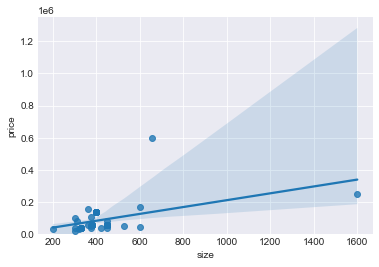

In [60]:
# Engine size as potential predictor variable of price
sns.regplot(x="size", y="price", data=d_floor)
plt.ylim(0,)

#### Correlation between size and price among floor type units
- Here we notice that size does not a significant influnce on the price of the unit as it might be assumed, but this is only among floor type units

In [61]:
d_floor[["size", "price"]].corr()

size     price
size   1.000000  0.448852
price  0.448852  1.000000

#### Correlation between ac and price among floor type units
- We can infer from the correlation between air condintioner and price that the unit price would actually increase much higher if they have ac than if the unit is bigger in size but does not have an ac system among floor type units.

In [62]:
d_floor[["ac", "price"]].corr()

ac     price
ac     1.000000  0.394694
price  0.394694  1.000000

#### Correlation between size and price among all accomodation types
- Here we notice that size has a higher impact on price when we find the correlation among all accomodation types

In [63]:
H_test[["size", "price"]].corr()

size     price
size   1.000000  0.026785
price  0.026785  1.000000

#### Correlation between ac and price among all kind of accomodation types
- Here we see that ac has a much lower impact on price when it is compared to all accomodation types

In [64]:
H_test[["ac", "price"]].corr()

ac     price
ac     1.000000  0.272933
price  0.272933  1.000000

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

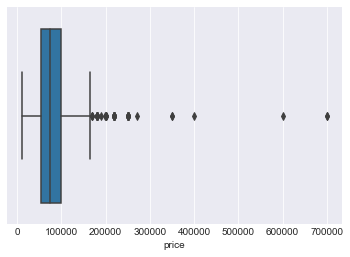

In [65]:
sns.boxplot(H_test['price'])